ibmqfactory.load_account:WARNING:2021-07-07 15:56:21,524: Credentials are already in use. The existing account in the session will be replaced.
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


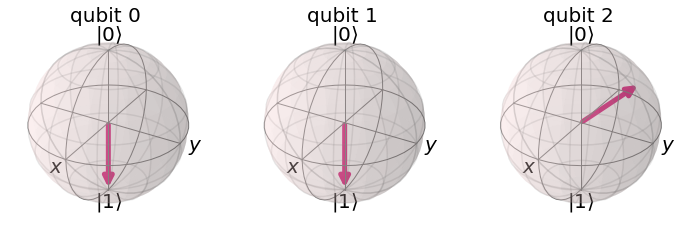

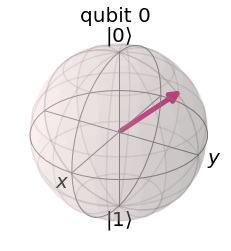

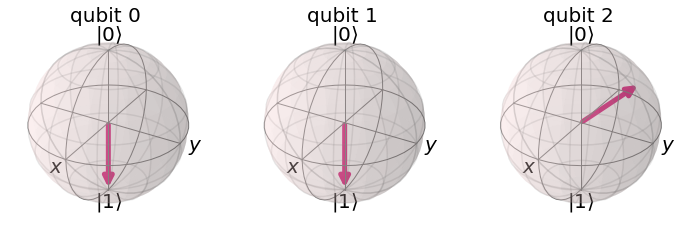

In [72]:
# Implementation of Simple Quantum Teleportation Procedure

# Import libraries
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Initialize random vector to be teleported
psi = random_state(1)

# Setting up the foundations of Alice and Bob's systems  
qr = QuantumRegister(3, name = "q") # initialize a register with three qubits 
cra = ClassicalRegister(1, name = "cra") 
crb = ClassicalRegister(1, name = "crb") # initialize two separate classical bits
# In our register, the first is the psi qubit, the second belongs to Alice, and the third belongs to Bob

# Initialize quantum circuit
qc = QuantumCircuit(qr, cra, crb)

init_gate = Initialize(psi)
init_gate.label = "init"
qc.append(init_gate, [0])
qc.barrier()

# In this procedure, the creation of an EPR pair is necessary.
def create_EPR_pair(qc, a, b): 
    qc.h(a) # apply Hadamard gate to qubit a
    qc.cx(a, b) # apply the CNOT gate using a as the control, and b as the target
    
# We first create our desired EPR pair between the second (q_1, Alice) and third qubits (q_2, Bob) of our circuit
create_EPR_pair(qc, 1, 2)

# Alice then applies the CNOT gate to her two qubits (psi is the control, her own qubit is the target)
qc.barrier()
qc.cx(0, 1)

# Alice applies the Hadamard gate to the psi qubit
qc.h(0)

# Alice performs a measurement on psi and her qubit
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

# Depending on the state of Alice's measurements (00, 01, 10, 11), Bob applies a series of X and Z gates
qc.barrier()
qc.x(2).c_if(cra, 1) # Apply gates if the registers 
qc.z(2).c_if(crb, 1) # are in the state '1'

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()

# Plot results
plot_bloch_multivector(psi)
plot_bloch_multivector(out_vector)